# Introduction

In [ ]:
"""
What? PCA for visualization - Handwritten digits

We explore what is perhaps one of the most broadly used of unsuper‐ vised algorithms, principal component 
analysis (PCA). PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a 
tool for visualization, for noise filtering, for feature extraction and engineering, and much more

VanderPlas, Jake. Python data science handbook: Essential tools for working with data. "O'Reilly Media, Inc.", 2016.
https://github.com/jakevdp/PythonDataScienceHandbook
"""

# Import modules

In [4]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
from sklearn.decomposition import PCA 

# Dataset

In [ ]:
"""
The data consists of 8×8 pixel images, meaning that they are 64- dimensional.
"""

In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

# PCA

In [ ]:
"""
To gain some intuition into the relationships between these points, we can use PCA to project them to a more 
manageable number of dimensions, say two:
"""

In [5]:
pca = PCA(2) 
projected = pca.fit_transform(digits.data)
print(digits.data.shape) 
print(projected.shape)

(1797, 64)
(1797, 2)


# Postprocessing

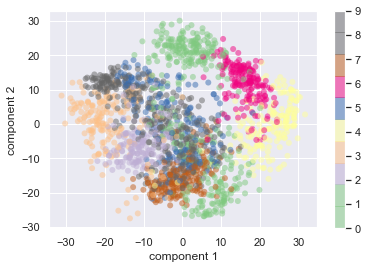

In [8]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

In [ ]:
"""
Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the 
projection of each data point along the directions with the largest variance. Essentially, we have found the 
OPTIMAL STRETCH AND ROTATION in 64-dimensional space that allows us to see the layout of the digits in two 
dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.
"""

# Choosing the number of components

In [ ]:
"""
A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the
data. We can determine this by looking at the cumulative explained variance ratio as a function of the number of
components
"""

Text(0, 0.5, 'cumulative explained variance')

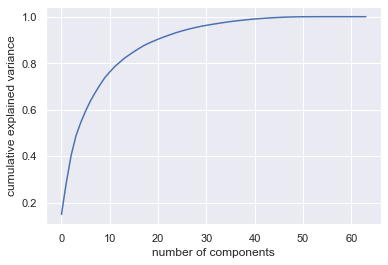

In [9]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
"""
This curve quantifies how much of the total, 64-dimensional variance is contained within the first N components. 
For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while
you need around 50 components to describe close to 100% of the variance.
"""